In [64]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from datasets import get_data
attr, test_attr, target = get_data()

### Correlation Between Features

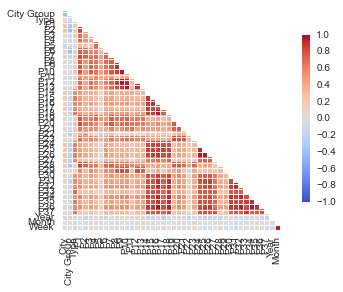

In [5]:
attr0 = attr.copy()
attr0['target'] = target
sns.corrplot(attr, annot=False, diag_names=False)

### Principle Components Analysis

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
train_pca = pca.fit_transform(attr)
print pca.explained_variance_ratio_

test_pca = pca.transform(test_attr)

[ 0.49584207  0.22271101  0.17536295  0.04558604  0.01481238  0.00850373
  0.00564627  0.00441966  0.00395728  0.00328173  0.00259054  0.00223844
  0.0017753   0.00159281  0.00149943]


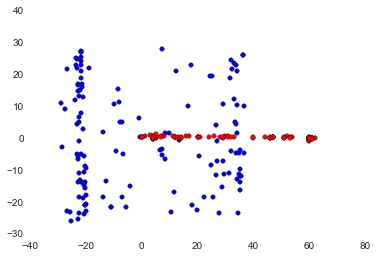

In [145]:
train_pca_0 = pca.inverse_transform(train_pca)
test_pca_0 = pca.inverse_transform(test_pca)

plt.scatter(train_pca[:, 0], train_pca[:, 1], c='b')
plt.scatter(train_pca_0[:, 0], train_pca_0[:, 1], c='r')
#plt.scatter(test_pca[:, 0], test_pca[:, 1], c='k')
#plt.scatter(test_pca_0[:, 0], test_pca_0[:, 1], c='g')

### Linear Regression and Cross Validation

In [146]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pca, target)

In [147]:
from sklearn.linear_model import LinearRegression, ElasticNetCV, OrthogonalMatchingPursuitCV
from sklearn.ensemble import ExtraTreesRegressor

#clf1 = ExtraTreesRegressor()
#clf1 = LinearRegression()
clf1 = OrthogonalMatchingPursuitCV()

clf1.fit(train_pca, target)

predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
print clf1.score(X_test, y_test)

0.205154206053


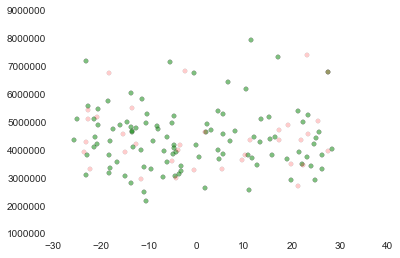

In [148]:
feature_num = 1
plt.scatter(X_train[:, feature_num], predicted_train, c='g', alpha=0.5)
plt.scatter(X_test[:, feature_num], predicted_test, c='r', alpha=0.2)

In [149]:
predictions = clf1.predict(test_pca)

In [150]:
submission = pd.DataFrame({'Prediction': predictions})
submission.to_csv('submission.csv', index_label='Id') 